## Chapter 6



### Quantum Gate UI

Ch 6: Visualizing the quantum gates
-----------------------------------
Start state:
0. |0⟩ 
1. |1⟩ 
+. |+⟩
-. |-⟩
R. |R⟩
L. |L⟩
r. Random (a|0⟩ + b|1⟩)
d. Define (θ and ϕ)
d
Enter start θ:
90
Enter start ϕ:
90
Enter a gate:
Available gates:
 ['id', 'x', 'y', 'z', 't', 'tdg', 's', 'sdg', 'h', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3', 'cx', 'cy', 'cz', 'ch', 'swap', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3']
y


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:121: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Unitary for the y gate:

[[0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
Press Enter to see the start setup...

Initial vector for |d〉:
[ 0.525+0.j    -0.381+0.761j]

Circuit:
--------
   ┌──────────────────────────────────────┐
q: ┤ Initialize(0.52532,-0.38127+0.7607j) ├
   └──────────────────────────────────────┘

State vector:
-------------
[ 0.525+0.j    -0.381+0.761j]


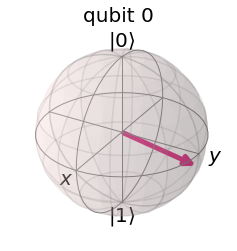

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:121: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


Press Enter to see the result after the y gate...

Circuit:
--------
   ┌──────────────────────────────────────┐┌───┐
q: ┤ Initialize(0.52532,-0.38127+0.7607j) ├┤ Y ├
   └──────────────────────────────────────┘└───┘

State vector:
-------------
[0.761+0.381j 0.   +0.525j]


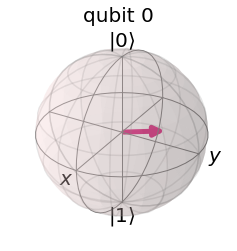

Press Enter to test another gate...
Start state:
0. |0⟩ 
1. |1⟩ 
+. |+⟩
-. |-⟩
R. |R⟩
L. |L⟩
r. Random (a|0⟩ + b|1⟩)
d. Define (θ and ϕ)
+
Enter a gate:
Available gates:
 ['id', 'x', 'y', 'z', 't', 'tdg', 's', 'sdg', 'h', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3', 'cx', 'cy', 'cz', 'ch', 'swap', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3']
x


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:121: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Unitary for the x gate:

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Press Enter to see the start setup...

Initial vector for |+〉:
[0.707+0.j 0.707+0.j]

Circuit:
--------
   ┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

State vector:
-------------
[0.707+0.j 0.707+0.j]


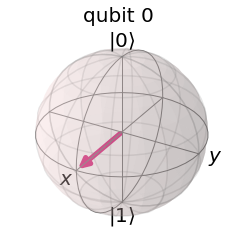

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:121: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


Press Enter to see the result after the x gate...exit

Circuit:
--------
   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ X ├
   └─────────────────────────────┘└───┘

State vector:
-------------
[0.707+0.j 0.707+0.j]


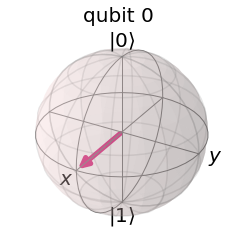

Press Enter to test another gate...0
Start state:
0. |0⟩ 
1. |1⟩ 
+. |+⟩
-. |-⟩
R. |R⟩
L. |L⟩
r. Random (a|0⟩ + b|1⟩)
d. Define (θ and ϕ)
exit
Enter a gate:
Available gates:
 ['id', 'x', 'y', 'z', 't', 'tdg', 's', 'sdg', 'h', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3', 'cx', 'cy', 'cz', 'ch', 'swap', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3']
exit
Not a valid start state.
Not a valid gate.
Try again...


In [20]:
# Import the required math
import numpy as np
import random #To create random state vector
import cmath #To juggle complex exponentials
from math import  sqrt, pi, sin, cos

from IPython.core.display import display

# Import the required Qiskit classes
from qiskit import QuantumCircuit, execute, Aer

# Import Blochsphere visualization
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

# Categorize our gates
rot_gates=["rx","ry","rz"]
unitary_gates=["u1","u2","u3"]
single_gates=["id","x","y","z","t","tdg","s","sdg","h"]+rot_gates
oneq_gates=single_gates+unitary_gates
control_gates=["cx","cy","cz","ch"]
twoq_gates=control_gates+["swap"]
all_gates=oneq_gates+twoq_gates+rot_gates+unitary_gates
# List our start states
start_states=["1","+","-","R","L","r","d"]
valid_start=["0"]+start_states



# Function that returns the state vector (Psi) for the circuit
def get_psi(circuit):
    global psi
    backend = Aer.get_backend('statevector_simulator') 
    result = execute(circuit, backend).result()
    psi = result.get_statevector(circuit)
    return(psi) 
        
# Function that returns the unitary of the circuit
def get_unitary(circuit):
    simulator = Aer.get_backend('unitary_simulator')
    result = execute(circuit, simulator).result()
    unitary = result.get_unitary(circuit)  
    return(unitary)      

# Function that creates a quantum circuit
def create_circuit(n_qubits,start):
    # Create the initial state vector
    if start=="1":
        initial_vector = [0,complex(1,0)]
    elif start=="+":
        # Create |+> state
        initial_vector = [1/sqrt(2) * complex(1, 0), 1/sqrt(2) * complex(1, 0)]
    elif start=="-":
        # Create |-> state
        initial_vector = [1/sqrt(2) * complex(1, 0), -1/sqrt(2) * complex(1, 0)]
    elif start=="R":
        # Create |R> state
        initial_vector = [1/sqrt(2) * complex(1, 0), 1*1.j/sqrt(2) * complex(1, 0)]
    elif start=="L":
        # Create |L> state
        initial_vector = [1/sqrt(2) * complex(1, 0), -1*1.j/sqrt(2) * complex(1, 0)]
    elif start=="r":
        # Create random initial vector
        theta=random.random()*pi
        phi=random.random()*2*pi
        a = cos(theta/2)
        b = cmath.exp(phi*1j)*sin(theta/2)
        initial_vector = [a * complex(1, 0), b * complex(1, 0)]
    elif start=="d":
        a = cos(start_theta/2)
        b = cmath.exp(start_phi*1j)*sin(start_theta/2)
        initial_vector = [a * complex(1, 0), b * complex(1, 0)]
    else:
        initial_vector = [complex(1,0),0]

    if start!="n":
        print("\nInitial vector for |"+start+"\u232A:")
        print(np.around(initial_vector, decimals = 3))
        
    # Create the circuit
    circuit = QuantumCircuit(n_qubits)
    # If the start state is not |0> initialize the qubit
    if start in start_states:
        circuit.initialize(initial_vector,n_qubits-1)

    return(circuit)

# Function that creates the required outputs for the circuit
def qgate_out(circuit,start):
    # Print the circuit
    psi=get_psi(circuit)
    if start!="n":
        print("\nCircuit:")
        print("--------")
        print(circuit)
        print("\nState vector:")
        print("-------------")
        print(np.around(psi, decimals = 3))
        display(plot_bloch_multivector(psi))
        if circuit.num_qubits>1 and gate in control_gates:
            display(plot_state_qsphere(psi))
    return(psi)

# Function that adds a gate to a circuit  
def qgate(gate,start): 
    # If the gates require angles, add those to the QASM code
    qasm_angle_gates={"rx":"rx("+str(theta)+") q[0];", "ry":"ry("+str(theta)+") q[0];", "rz":"rz("+str(phi)+") q[0];", "u1":"u1("+str(phi)+") q[0];", "u2":"u2("+str(phi)+","+str(lam)+") q[0];", "u3":"u3("+str(theta)+","+str(phi)+","+str(lam)+") q[0];"}

    # Create the circuits and then add the gate using QASM import 
    if gate in oneq_gates:
        circuit=create_circuit(1,start)
        qasm_string='OPENQASM 2.0; include "qelib1.inc"; qreg q[1];'
    else: 
        circuit=create_circuit(2,start)
        qasm_string='OPENQASM 2.0; include "qelib1.inc"; qreg q[2];'
    qgate_out(circuit,start)
    
    if gate in oneq_gates:
        if gate in rot_gates+unitary_gates:
            circuit+=QuantumCircuit.from_qasm_str(qasm_string+qasm_angle_gates[gate])
        else:
            circuit+=QuantumCircuit.from_qasm_str(qasm_string+gate+" q[0];")
    else:
        circuit+=QuantumCircuit.from_qasm_str(qasm_string+gate+" q[1],q[0];")
    
    return(circuit)

# Main navigation
def main(): 
    print("Ch 6: Visualizing the quantum gates")
    print("-----------------------------------")
    
    # Set the global parameters
    global phi, theta, lam, start_theta, start_phi
    phi=0.0
    theta=0.0
    lam=0.0
    global gate
    gate=""
    
    while gate !="exit":    
        # Set up the start conditions
        start=input("Start state:\n0. |0\u27E9 \n1. |1\u27E9 \n+. |+\u27E9\n-. |-\u27E9\nR. |R\u27E9\nL. |L\u27E9\nr. Random (a|0\u27E9 + b|1\u27E9)\nd. Define (\u03B8 and \u03D5)\n")
        if start =="d":
            # Specify initial vector
            start_theta=float(input("Enter start \u03B8:\n"))
            start_phi=float(input("Enter start \u03D5:\n"))
        # Select a gate
        print("Enter a gate:\nAvailable gates:\n",all_gates)
        gate=input()
        if gate in ["rx", "ry","u3"]:
            theta=input("Enter rotation (\u03B8):\n")
        if gate in ["u1","u2","u3","rz",]:
            phi=input("Enter rotation (\u03D5):\n")
        if gate in ["u2","u3"]:
            lam=input("Enter rotation (\u03BB):\n")
        if gate in all_gates and start in valid_start:
            # Display the gate unitary for a blank circuit
            blank_qc=qgate(gate,"n")
            print("\nUnitary for the " + gate + " gate:\n")
            print(np.around(get_unitary(blank_qc), decimals = 3))
            # Build the quantum circuit for the gate
            input("Press Enter to see the start setup...")
            qc=qgate(gate, start)
            # Visualize the circuit and the qubit(s)
            input("Press Enter to see the result after the "+gate+" gate...")
            qgate_out(qc,start)
            input("Press Enter to test another gate...")
        else:
            if start not in valid_start:
                print("Not a valid start state.")
            if gate not in all_gates:
                print("Not a valid gate.")
            print("Try again...")

if __name__ == '__main__':
    main()

### Unitary Animation

In [21]:
from qiskit import QuantumCircuit, execute, Aer

from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

# Import image and file processing tools
from PIL import Image
import os

print("Ch 6: Animating the U gates")
print("--------------------------")

# This program requires an /images directory at the same location as the script.
dirName = 'images'
print("Checking if /images directory exists...")
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory" , dirName ,  "created ")
else:    
    print("Directory" , dirName ,  "exists")


def get_psi(circuit):
    global psi
    backend = Aer.get_backend('statevector_simulator') 
    result = execute(circuit, backend).result()
    psi = result.get_statevector(circuit)
    return(psi) 

def create_images(gate,theta=0.0,phi=0.0,lam=0.0):
    # Set the loop parameters
    steps=20.0
    theta_steps=theta/steps
    phi_steps=phi/steps
    lam_steps=lam/steps
    n, theta,phi,lam=0,0.0,0.0,0.0
    # Create image and animation tools
    global q_images, b_images, q_filename, b_filename
    b_images=[]
    q_images=[]
    b_filename="animated_qubit"
    q_filename="animated_qsphere"

    # The image creation loop
    while n < steps+1:
        qc=QuantumCircuit(1)
        if gate=="u3":
            qc.u3(theta,phi,lam,0)
            title="U3: \u03B8 = "+str(round(theta,2))+" \u03D5 = "+str(round(phi,2))+" \u03BB = "+str(round(lam,2))
        elif gate=="u2":
            qc.u2(phi,lam,0)
            title="U2: \u03D5 = "+str(round(phi,2))+" \u03BB = "+str(round(lam,2))
        else:
            qc.h(0)
            qc.u1(phi,0)
            title="U1: \u03D5 = "+str(round(phi,2))

        # Get the statevector of the qubit 
        # Create Bloch sphere images
        plot_bloch_multivector(get_psi(qc),title).savefig('images/bloch'+str(n)+'.png')
        imb = Image.open('images/bloch'+str(n)+'.png')
        b_images.append(imb)
        # Create Q sphere images
        plot_state_qsphere(psi).savefig('images/qsphere'+str(n)+'.png')
        imq = Image.open('images/qsphere'+str(n)+'.png')
        q_images.append(imq)
        # Rev our loop
        n+=1
        theta+=theta_steps
        phi+=phi_steps
        lam+=lam_steps

# Create and save the animated GIFs
def save_gif(gate):
    duration=100
    b_images[0].save(gate+'_'+b_filename+'.gif',
               save_all=True,
               append_images=b_images[1:],
               duration=duration,
               loop=0)
    q_images[0].save(gate+'_'+q_filename+'.gif',
               save_all=True,
               append_images=q_images[1:],
               duration=duration,
               loop=0)
    print("Bloch sphere animation saved as: \n"+os.getcwd()+"/"+gate+"_"+b_filename+".gif"+"\nQsphere animation saved as: \n"+os.getcwd()+"/"+gate+"_"+q_filename+".gif")

# Main loop
def main(): 
    global gate
    gate=""
    theta=0.0
    phi=0.0
    lam=0.0
    while gate !="exit": 
        gate=input("Enter u1, u2, or u3:\n")
        if gate =="u3":
            theta=float(input("Enter \u03B8:\n"))
        if gate in ["u3","u2","u1"]:
            phi=float(input("Enter \u03D5:\n"))
        if gate in ["u3","u2"]:
            lam=float(input("Enter \u03BB:\n"))
        if gate in ["u3","u2","u1"]:
            print("Building animation...")
            create_images(gate,theta,phi,lam)
            save_gif(gate)
        else:
            print("Not a valid gate, try again...")
            
if __name__ == '__main__':
    main()

Ch 6: Animating the U gates
--------------------------
Checking if /images directory exists...
Directory images exists
Enter u1, u2, or u3:
u2
Enter ϕ:
90
Enter λ:
90
Building animation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.u2 method is depreca

Bloch sphere animation saved as: 
/content/u2_animated_qubit.gif
Qsphere animation saved as: 
/content/u2_animated_qsphere.gif
Enter u1, u2, or u3:
u2
Enter ϕ:
180
Enter λ:
180
Building animation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.u2 method is depreca

Bloch sphere animation saved as: 
/content/u2_animated_qubit.gif
Qsphere animation saved as: 
/content/u2_animated_qsphere.gif
Enter u1, u2, or u3:
exit
Not a valid gate, try again...


### Transpiler

In [22]:
print("Loading Qiskit...")
from qiskit import QuantumCircuit, IBMQ
from qiskit.compiler import transpile
from qiskit.providers.ibmq import least_busy

from IPython.core.display import display

# Load account and find an available 5-qubit backend
print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

print("Getting backend...")
backend = least_busy(provider.backends(n_qubits=5, operational=True, simulator=False))

# Uncomment to set the backend to a simulator
#backend = provider.get_backend('ibmq_qasm_simulator')

print("Ch 6: Transpiling circuits")
print("--------------------------")

# Print the basis gates and coupling map for the selected backend
print("Basis gates for:", backend)
print(backend.configuration().basis_gates)
print("Coupling map for:", backend)
print(backend.configuration().coupling_map)

def build_circuit(choice):
    # Create the circuit 
    qc = QuantumCircuit(5,5)
    
    if choice=="1":
        # Simple X
        qc.x(0)
    elif choice=="2":
        # Add H
        qc.x(0)
        qc.h(0)
    elif choice=="3":
        # H + Barrier
        qc.x(0)
        qc.barrier(0)
        qc.h(0)
    elif choice=="4":
        # Controlled Y (CY)
        qc.cy(0,1)
    elif choice=="5":    
        # Non-conforming CX
        qc.cx(0,4)
    else:
        # Multi qubit circuit
        qc.h(0)
        qc.h(3)
        qc.cx(0,4)
        qc.cswap(3,1,2)

    # Show measurement targets
    #qc.barrier([0,1,2,3,4])
    #qc.measure([0,1,2,3,4],[0,1,2,3,4])

    return(qc)



def main(): 
    choice="1"
    while choice !="0": 
        choice=input("Pick a circuit: \n1. Simple X\n2. Add H\n3. H + Barrier\n4. Controlled-Y\n5. Non-conforming CX\n6. Multi-gate\n")
        qc=build_circuit(choice) 
        # Create the transpiled circuit
        trans_qc = transpile(qc, backend)
        
        # Print the original and transpiled circuits
        print("Circuit:")
        display(qc.draw())
        print("Transpiled circuit:")
        display(trans_qc.draw())
        
        # Print the original and transpiled circuit depths
        print("Circuit depth:")
        print("---------------")
        print("Circuit:", qc.depth())
        print("Transpiled circuit:", trans_qc.depth())
        
        # Print the original and transpiled circuit sizes
        print("\nCircuit size:")
        print("---------------")
        print("Circuit:", qc.size())
        print("Transpiled circuit:", trans_qc.size())

if __name__ == '__main__':
    main()

Loading Qiskit...
Getting provider...
Getting backend...
Ch 6: Transpiling circuits
--------------------------
Basis gates for: ibmq_manila
['id', 'rz', 'sx', 'x', 'cx', 'reset']
Coupling map for: ibmq_manila
[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]
Pick a circuit: 
1. Simple X
2. Add H
3. H + Barrier
4. Controlled-Y
5. Non-conforming CX
6. Multi-gate
5
Circuit:


q_0: ──■──
       │  
q_1: ──┼──
       │  
q_2: ──┼──
       │  
q_3: ──┼──
     ┌─┴─┐
q_4: ┤ X ├
     └───┘
c: 5/═════

Transpiled circuit:


┌───┐
q_4 -> 0 ┤ X ├
         └─┬─┘
q_0 -> 1 ──■──
              
q_1 -> 2 ─────
              
q_2 -> 3 ─────
              
q_3 -> 4 ─────
              
    c: 5/═════

Circuit depth:
---------------
Circuit: 1
Transpiled circuit: 1

Circuit size:
---------------
Circuit: 1
Transpiled circuit: 1
Pick a circuit: 
1. Simple X
2. Add H
3. H + Barrier
4. Controlled-Y
5. Non-conforming CX
6. Multi-gate
0
Circuit:


┌───┐        
q_0: ┤ H ├──■─────
     └───┘  │     
q_1: ───────┼───X─
            │   │ 
q_2: ───────┼───X─
     ┌───┐  │   │ 
q_3: ┤ H ├──┼───■─
     └───┘┌─┴─┐   
q_4: ─────┤ X ├───
          └───┘   
c: 5/═════════════

Transpiled circuit:


global phase: 9π/8
                                          ┌───┐                               »
q_4 -> 0 ──────────────────────────────■──┤ X ├──■────────────────────────────»
         ┌─────────┐┌────┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐                  ┌───┐   »
q_3 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──┤ X ├──────────────────┤ X ├───»
         └─────────┘└────┘└─────────┘└───┘     └───┘     ┌───┐        └─┬─┘   »
q_2 -> 2 ─────■───────────────────────────────────────■──┤ X ├──■───────■─────»
            ┌─┴─┐                         ┌───┐     ┌─┴─┐└─┬─┘┌─┴─┐┌─────────┐»
q_1 -> 3 ───┤ X ├──────────────────────■──┤ X ├──■──┤ X ├──■──┤ X ├┤ Rz(π/2) ├»
         ┌──┴───┴──┐┌────┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘     └───┘└─────────┘»
q_0 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├──■──┤ X ├──────────────────────────»
         └─────────┘└────┘└─────────┘└───┘     └───┘                          »
    c: 5/═════════════════════════════════════════════════════════════════════»
                                                                              »
«                  ┌───┐                                                   »
«q_4 -> 0 ──■──────┤ X ├─────■─────────────────────────────────────────────»
«         ┌─┴─┐    └─┬─┘   ┌─┴─┐                                           »
«q_3 -> 1 ┤ X ├──────■─────┤ X ├─────────────────────────────■─────────────»
«         └───┘            └───┘                 ┌───┐     ┌─┴─┐┌─────────┐»
«q_2 -> 2 ────────────────────────────────────■──┤ X ├──■──┤ X ├┤ Rz(π/4) ├»
«         ┌────┐┌─────────┐┌───┐┌──────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘└─────────┘»
«q_1 -> 3 ┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├┤ X ├──■──┤ X ├────────────────»
«         └────┘└─────────┘└─┬─┘└──────────┘└───┘     └───┘                »
«q_0 -> 4 ───────────────────■─────────────────────────────────────────────»
«                                                                          »
«    c: 5/═════════════════════════════════════════════════════════════════»
«                                                                          »
«                                                                    »
«q_4 -> 0 ───────────────────────────────────────────────────────────»
«                                ┌───┐                               »
«q_3 -> 1 ─────────────────■─────┤ X ├──────■────────────────────────»
«              ┌───┐     ┌─┴─┐   └─┬─┘    ┌─┴─┐┌───┐     ┌──────────┐»
«q_2 -> 2 ──■──┤ X ├──■──┤ X ├─────■──────┤ X ├┤ X ├──■──┤ Rz(3π/4) ├»
«         ┌─┴─┐└─┬─┘┌─┴─┐├───┤┌──────────┐└───┘└─┬─┘┌─┴─┐└──────────┘»
«q_1 -> 3 ┤ X ├──■──┤ X ├┤ X ├┤ Rz(-π/4) ├───────■──┤ X ├─────■──────»
«         └───┘     └───┘└─┬─┘├─────────┬┘          └───┘   ┌─┴─┐    »
«q_0 -> 4 ─────────────────■──┤ Rz(π/4) ├───────────────────┤ X ├────»
«                             └─────────┘                   └───┘    »
«    c: 5/═══════════════════════════════════════════════════════════»
«                                                                    »
«                                          
«q_4 -> 0 ─────────────────────────────────
«                                          
«q_3 -> 1 ─────────────────────────────────
«            ┌────┐   ┌─────────┐          
«q_2 -> 2 ───┤ √X ├───┤ Rz(π/2) ├───────■──
«         ┌──┴────┴─┐ └──┬───┬──┘     ┌─┴─┐
«q_1 -> 3 ┤ Rz(π/4) ├────┤ X ├─────■──┤ X ├
«         ├─────────┴┐   └─┬─┘   ┌─┴─┐└───┘
«q_0 -> 4 ┤ Rz(-π/4) ├─────■─────┤ X ├─────
«         └──────────┘           └───┘     
«    c: 5/═════════════════════════════════
«

Circuit depth:
---------------
Circuit: 2
Transpiled circuit: 32

Circuit size:
---------------
Circuit: 4
Transpiled circuit: 50
